In [ ]:
# 2) MatplotlibÏóê ÏÉà Ìè∞Ìä∏Î•º Îì±Î°ùÌïòÍ≥† Í∏∞Î≥∏ Ìè∞Ìä∏Î°ú ÏßÄÏ†ï
import matplotlib as mpl
from matplotlib import font_manager as fm

# Nanum Ìè∞Ìä∏ Í≤ΩÎ°úÏóêÏÑú ttfÎ•º Ï∞æÏïÑ Îì±Î°ù
nanum_paths = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'], fontext='ttf')
for p in nanum_paths:
    fm.fontManager.addfont(p)

mpl.rcParams['font.family'] = 'NanumGothic'   # ÌòπÏùÄ 'NanumBarunGothic' Îì± Îì±Î°ùÎêú Ïù¥Î¶ÑÏù¥Î©¥ Î™®Îëê Í∞ÄÎä•
mpl.rcParams['axes.unicode_minus'] = False    # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ


In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/train.csv', encoding='utf-8')
bi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/building_info.csv', encoding='utf-8')

KEY = 'Í±¥Î¨ºÎ≤àÌò∏'  # ‚Üê Ïã§Ï†ú ÌÇ§ Ïª¨ÎüºÎ™ÖÏúºÎ°ú Î∞îÍøîÏ§ò (Ïòà: 'building_id')
df = train.merge(bi, on=KEY, how='left')

target = 'Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)'  # ÌÉÄÍπÉ Ïª¨ÎüºÎ™Ö
df['ÏùºÏãú'] = pd.to_datetime(df['ÏùºÏãú'], errors='coerce')

# Ïà´Ïûê/Î≤îÏ£º Ïª¨Îüº Î∂ÑÎ¶¨
num_cols = df.select_dtypes('number').columns.tolist()
if target in num_cols:  # ÌÉÄÍπÉÏùÄ Îî∞Î°ú Í¥ÄÎ¶¨
    num_cols.remove(target)
cat_cols = df.select_dtypes(['object', 'category']).columns.tolist()

In [ ]:
!pip install koreanize-matplotlib

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.9/7.9 MB 48.7 MB/s eta 0:00:00


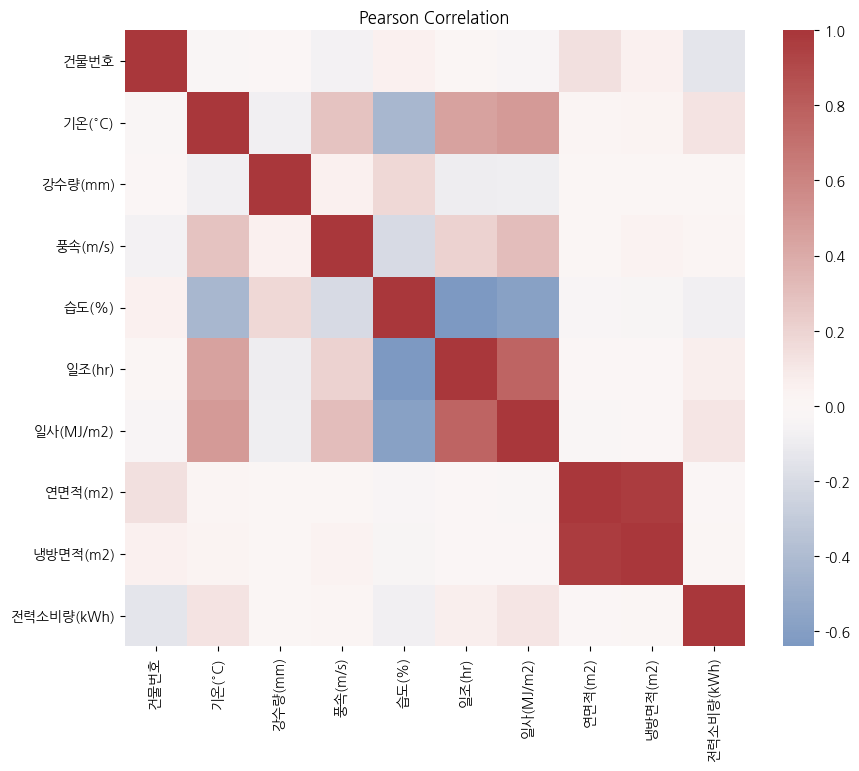

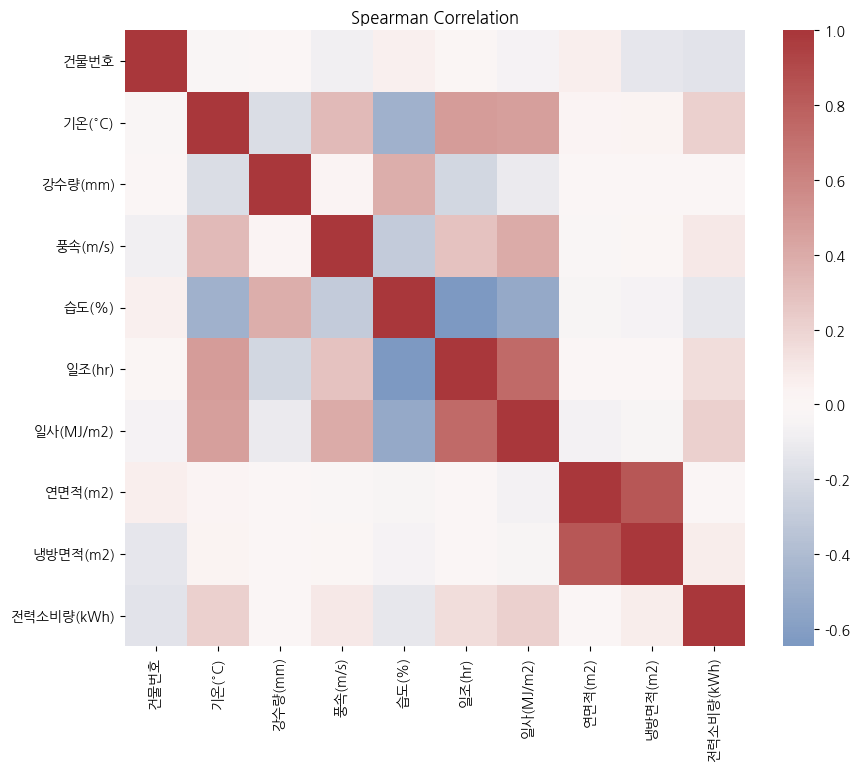

In [ ]:
import seaborn as sns, numpy as np, matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols+[target]].corr(method='pearson'), center=0, cmap='vlag')
plt.title('Pearson Correlation')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols+[target]].corr(method='spearman'), center=0, cmap='vlag')
plt.title('Spearman Correlation')
plt.show()


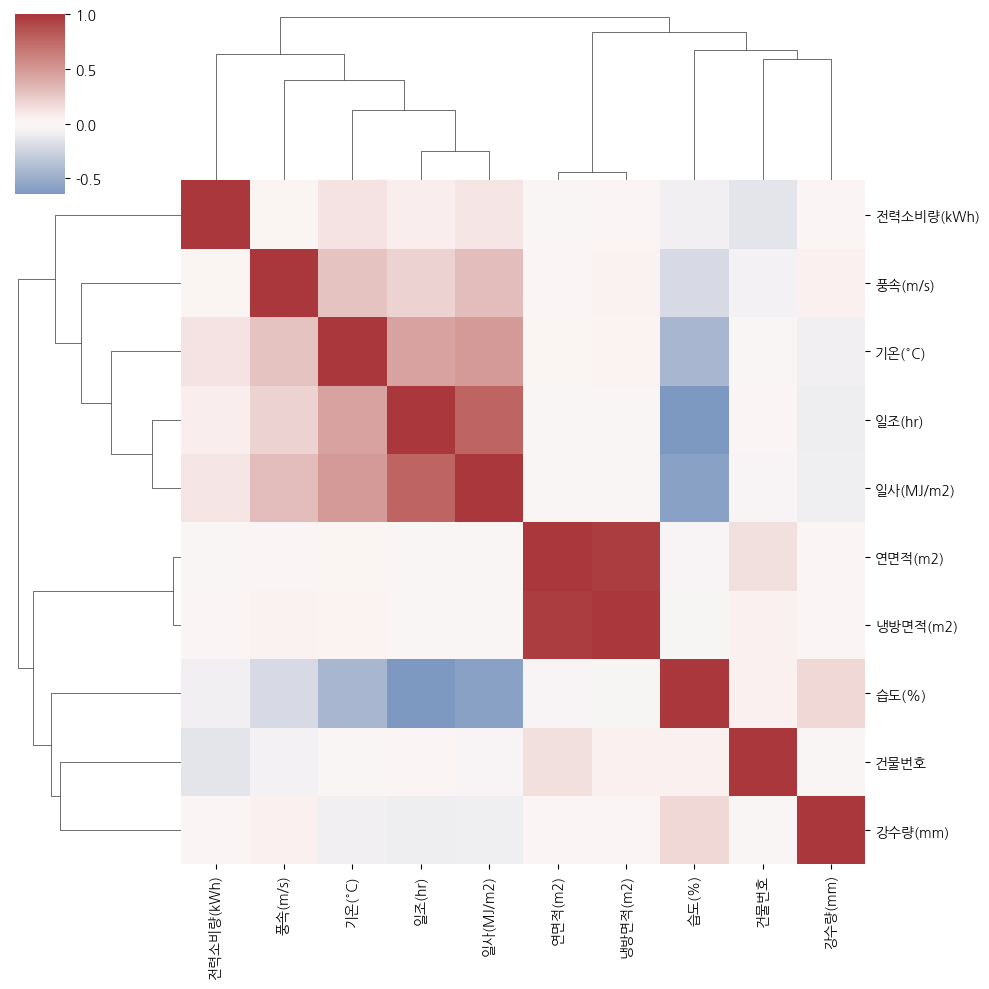

In [ ]:
sns.clustermap(df[num_cols+[target]].corr(), cmap='vlag', center=0, figsize=(10,10))


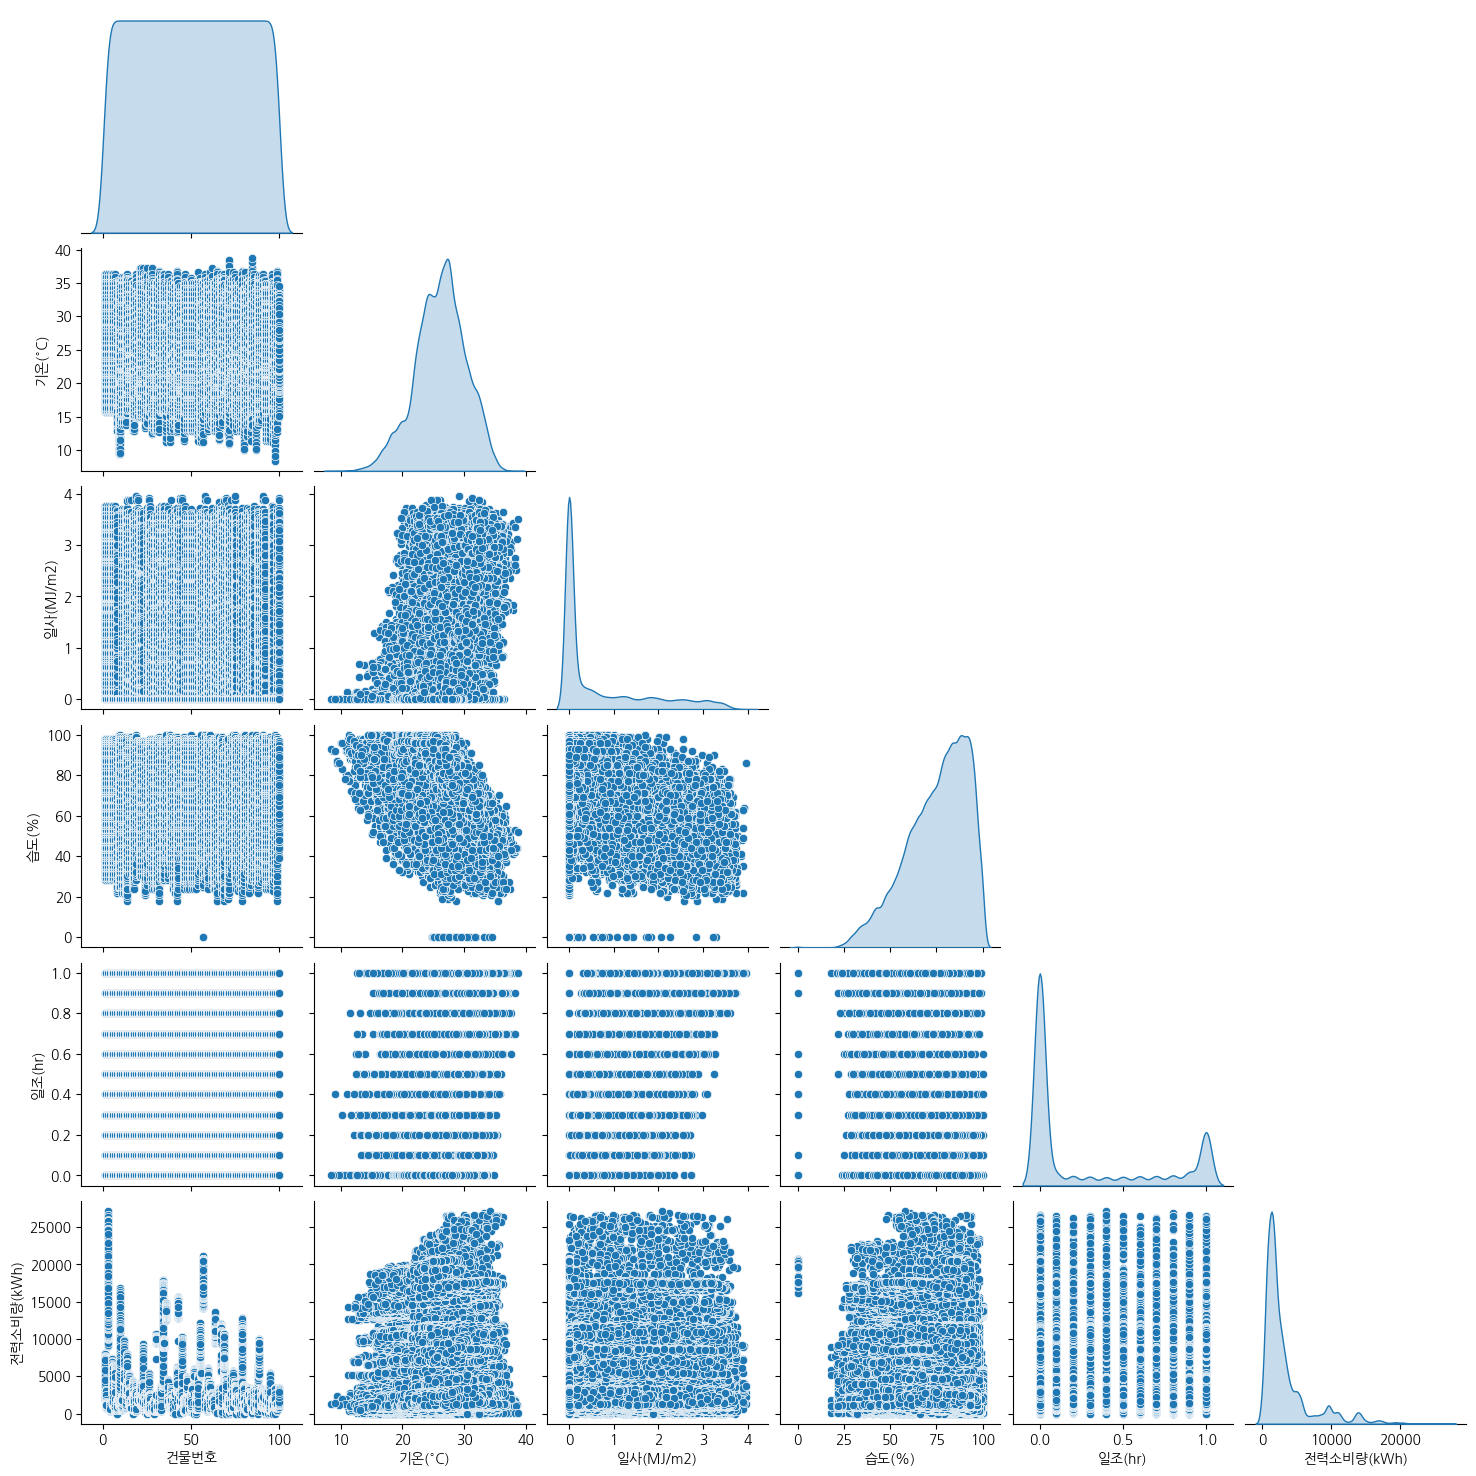

In [ ]:
topk = (df[num_cols].corrwith(df[target])
        .abs().sort_values(ascending=False).head(5).index.tolist())
sns.pairplot(df, vars=topk+[target], hue=None, corner=True, diag_kind='kde')


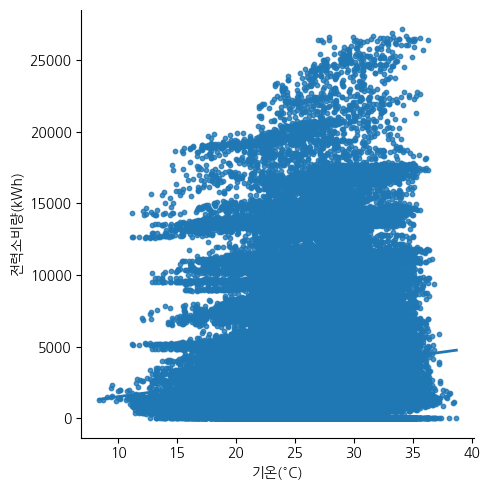

In [ ]:
sns.lmplot(data=df, x='Í∏∞Ïò®(¬∞C)', y=target, scatter_kws={'s':10}, line_kws={'lw':2})


<Axes: xlabel='Í∏∞Ïò®(¬∞C)', ylabel='Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)'>

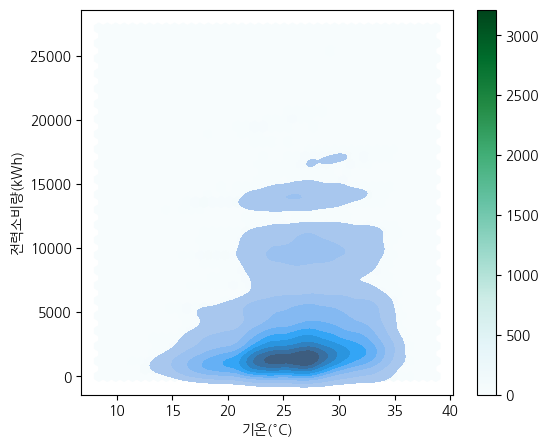

In [ ]:
df.plot(kind='hexbin', x='Í∏∞Ïò®(¬∞C)', y=target, gridsize=40, figsize=(6,5), sharex=False)
sns.kdeplot(data=df, x='Í∏∞Ïò®(¬∞C)', y=target, fill=True, thresh=0.05)


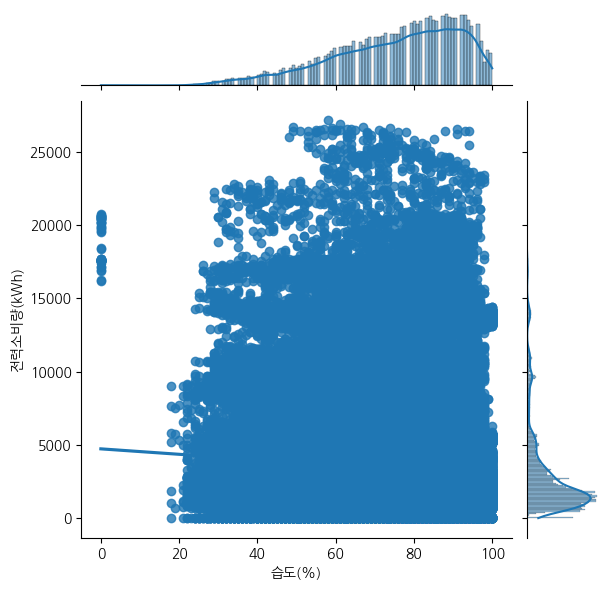

In [ ]:
sns.jointplot(data=df, x='ÏäµÎèÑ(%)', y=target, kind='reg')


<Axes: xlabel='Í±¥Î¨ºÏú†Ìòï', ylabel='Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)'>

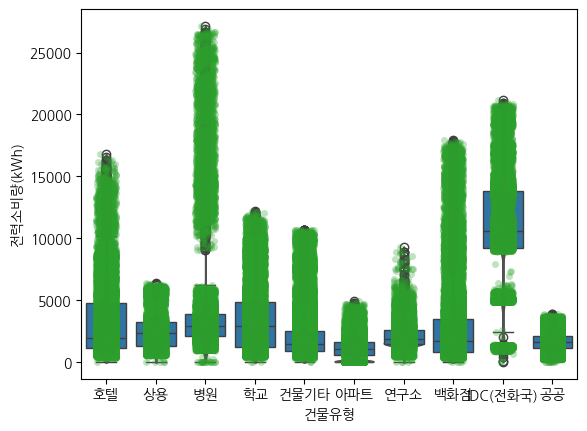

In [ ]:
sns.boxplot(data=df, x='Í±¥Î¨ºÏú†Ìòï', y=target)
sns.violinplot(data=df, x='Í±¥Î¨ºÏú†Ìòï', y=target, cut=0)
sns.stripplot(data=df, x='Í±¥Î¨ºÏú†Ìòï', y=target, alpha=0.3, jitter=0.2)


ÏúÑÏùò Í∑∏ÎûòÌîÑÎ•º Î≥¥Í≥† Í±¥Î¨ºÏú†ÌòïÎ≤å Ïù¥ÏÉÅÏπòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏù¥ Îî∞Î°ú ÌôïÏù∏Ìï¥Ïïº Í≤†Îã§Í≥† ÏÉùÍ∞ÅÌï®

count       mean_gfa  median_gfa      mean_cool  median_cool
Í±¥Î¨ºÏú†Ìòï                                                                  
Í±¥Î¨ºÍ∏∞ÌÉÄ      20400  434137.068900  106985.500  262467.462500    60885.500
ÌïôÍµê        20400  351290.481300  342560.845  190519.879000   177814.750
ÏïÑÌååÌä∏       18360  304948.496667  300496.816  205633.047667   233263.000
Î≥ëÏõê        18360  157621.507778   99347.350  117535.680000    72627.980
Ìò∏ÌÖî        20400  148146.785000   97167.750  103288.628000    68037.655
Î∞±ÌôîÏ†ê       32640  133947.159375  120025.325   63127.165000    53329.000
Í≥µÍ≥µ        16320  133799.302500  123575.830   54304.158750    54222.000
ÏÉÅÏö©        20400   81677.582000   42459.350   38479.131000    21118.675
Ïó∞Íµ¨ÏÜå       18360   74157.081111   72573.530   48866.634444    44576.270
IDC(Ï†ÑÌôîÍµ≠)  18360   42075.580000   36142.330   19153.718889    19232.000

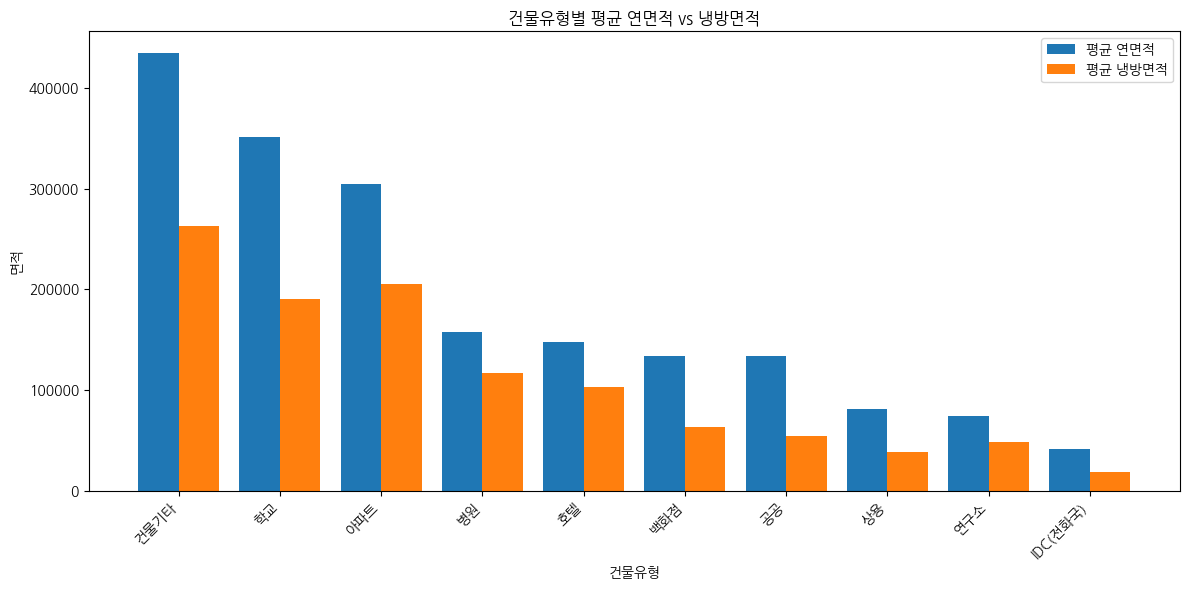

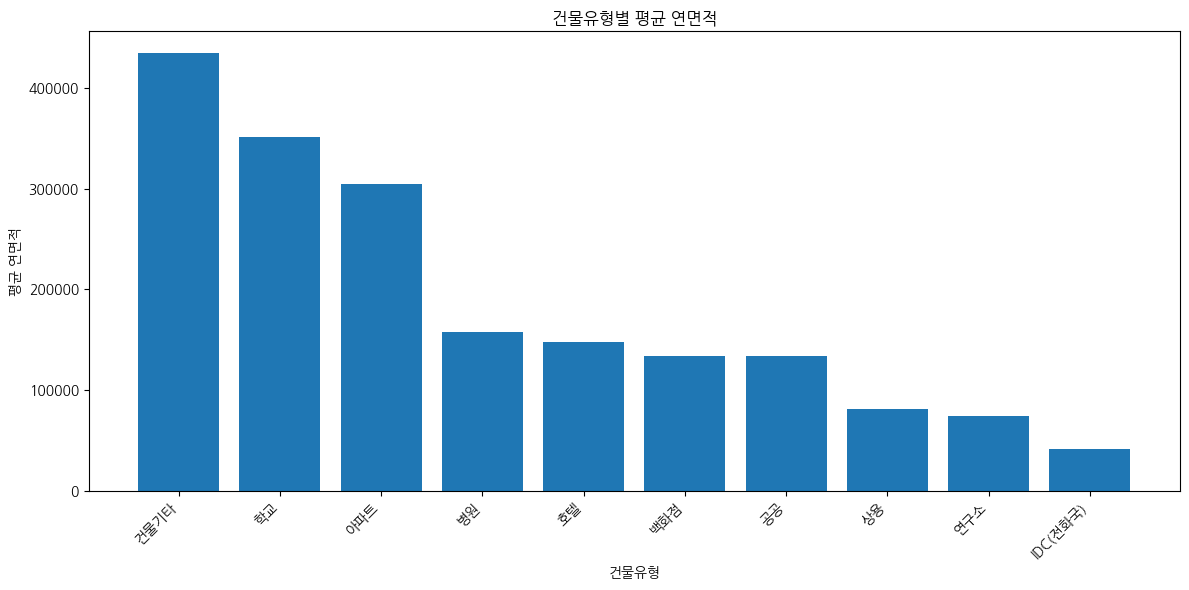

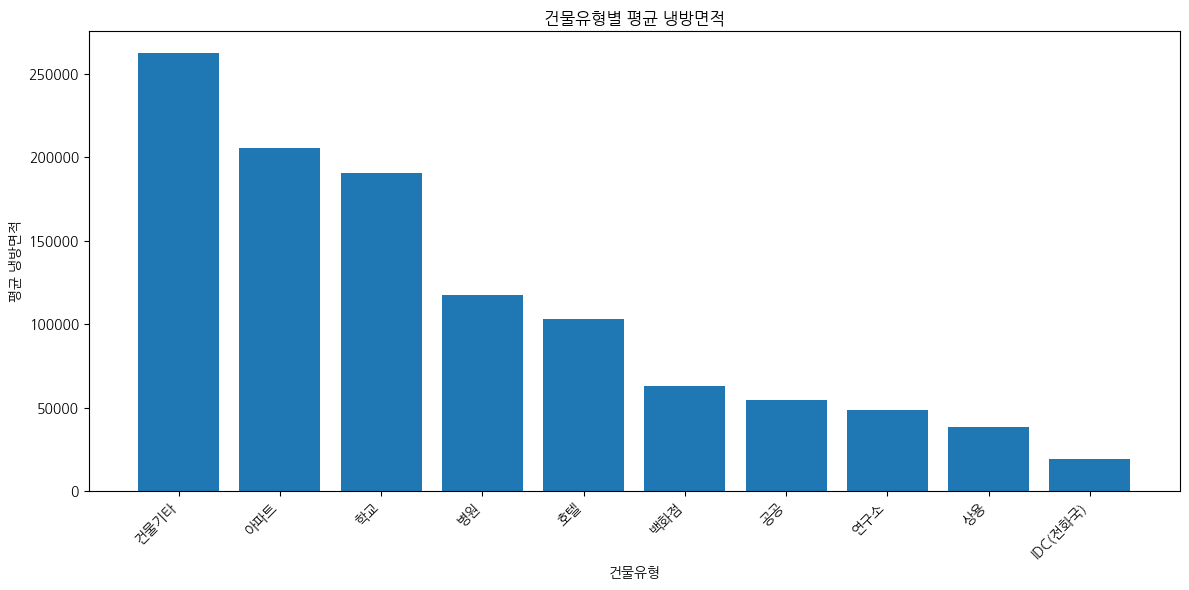

/tmp/ipython-input-554105664.py:130: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_gfa, labels=[str(t) for t in order], showfliers=False)


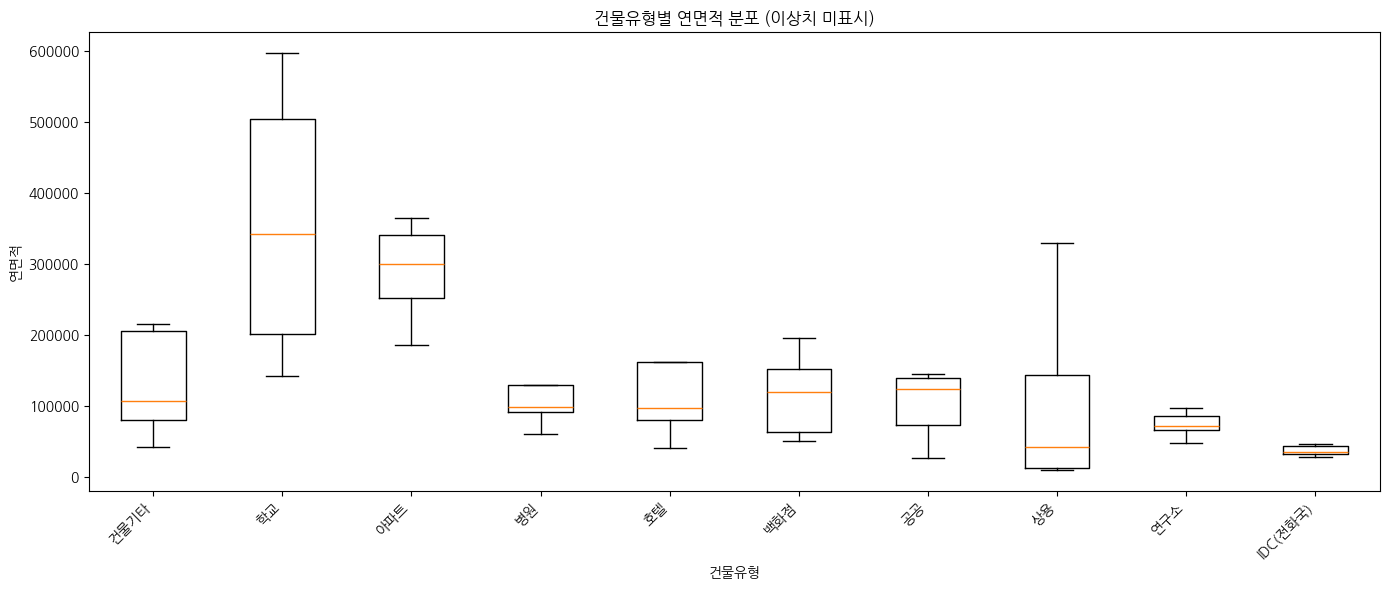

/tmp/ipython-input-554105664.py:141: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_cool, labels=[str(t) for t in order], showfliers=False)


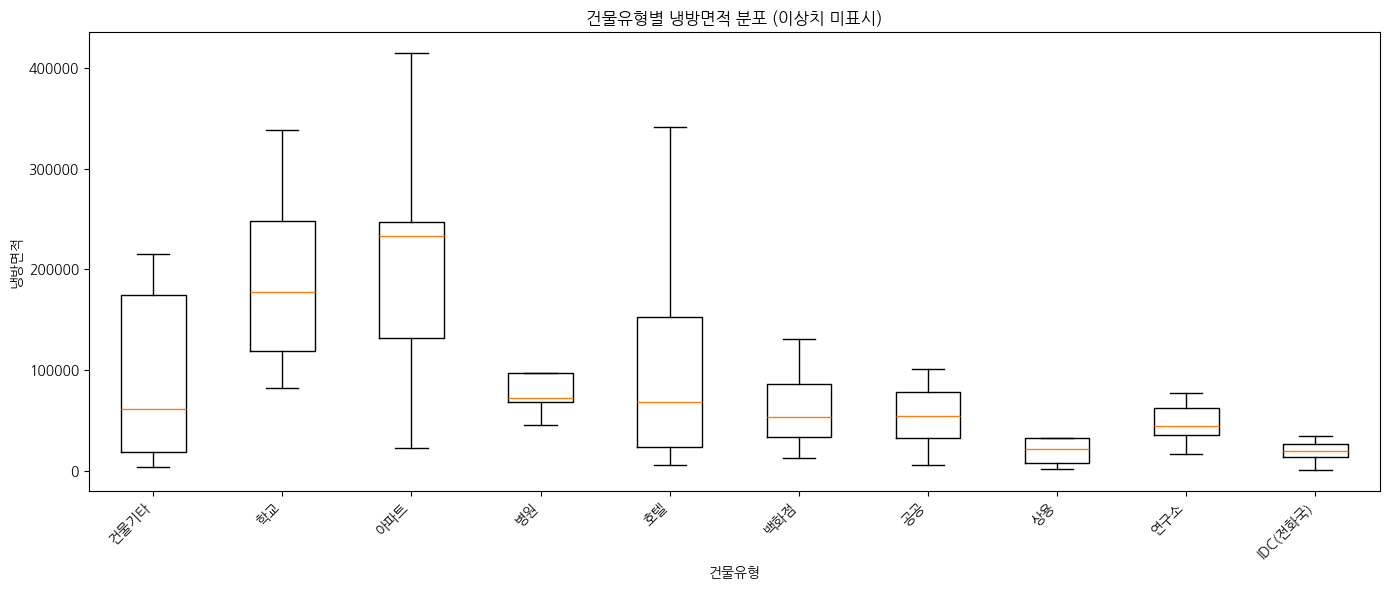

‚úÖ Ï†ÄÏû• Í≤ΩÎ°ú: ./plots


In [ ]:
# =========================================
# Í±¥Î¨ºÏú†ÌòïÎ≥Ñ Ïó∞Î©¥Ï†Å/ÎÉâÎ∞©Î©¥Ï†Å Í∑∏ÎûòÌîÑ (ÎåÄÏ≤¥ ÏΩîÎìú)
# - Ïô∏Î∂Ä Ïú†Ìã∏ Î∂àÌïÑÏöî, ÌëúÎäî IPython.displayÎ°ú ÌëúÏãú
# - ÌïúÍ∏Ä Ìè∞Ìä∏ ÏûêÎèô ÏÑ§Ï†ï(Colab/Linux/Windows/macOS)
# =========================================
import os, re
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from IPython.display import display

# ---------- 0) ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ----------
def setup_korean_font():
    # Colab/LinuxÏóêÏÑú Nanum Ìè∞Ìä∏Í∞Ä ÏÑ§ÏπòÎèº ÏûàÎã§Î©¥ Îì±Î°ù
    nanum_dir = "/usr/share/fonts/truetype/nanum"
    if os.path.isdir(nanum_dir):
        for p in fm.findSystemFonts(fontpaths=[nanum_dir], fontext='ttf'):
            fm.fontManager.addfont(p)

    installed = {f.name for f in fm.fontManager.ttflist}
    for name in ["NanumGothic", "Malgun Gothic", "AppleGothic",
                 "Noto Sans CJK KR", "Noto Sans CJK", "NotoSansKR-Regular"]:
        if name in installed:
            mpl.rcParams["font.family"] = name
            break
    mpl.rcParams["axes.unicode_minus"] = False

setup_korean_font()

# ---------- 1) Í≤ΩÎ°ú/Ïù∏ÏΩîÎî© robust Î°úÎî© ----------
def find_first_existing(paths):
    for p in paths:
        if os.path.exists(p):
            return p
    raise FileNotFoundError(paths)

train =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/train.csv', encoding='utf-8')
bi   =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/building_info.csv', encoding='utf-8')


# ---------- 2) Ïª¨Îüº ÏûêÎèô ÌÉêÏÉâ ----------
def find_col(cols, patterns):
    for pat in patterns:
        for c in cols:
            if re.search(pat, str(c)):
                return c
    return None

key_train = find_col(train.columns, [r"Í±¥Î¨ºÎ≤àÌò∏", r"building[_\s-]*id", r"Í±¥Î¨º\s*ID", r"bldg[_\s-]*id"])
key_bi    = find_col(bi.columns,    [r"Í±¥Î¨ºÎ≤àÌò∏", r"building[_\s-]*id", r"Í±¥Î¨º\s*ID", r"bldg[_\s-]*id"])
btype_col = find_col(bi.columns,    [r"Í±¥Î¨º\s*Ïú†Ìòï", r"Í±¥Î¨º\s*Ïö©ÎèÑ", r"Ïú†Ìòï", r"Ïö©ÎèÑ"])
gfa_col   = find_col(bi.columns,    [r"Ïó∞\s*Î©¥\s*Ï†Å", r"Ï¥ù\s*Î©¥\s*Ï†Å", r"Ïó∞Î©¥Ï†Å", r"GFA", r"floor\s*area"])
cool_col  = find_col(bi.columns,    [r"ÎÉâ\s*Î∞©\s*Î©¥\s*Ï†Å", r"ÎÉâÎ∞©Î©¥Ï†Å", r"cool.*area"])

missing = []
if key_train is None or key_bi is None: missing.append("Î≥ëÌï©ÌÇ§(Í±¥Î¨ºÎ≤àÌò∏/building_id)")
if btype_col is None: missing.append("Í±¥Î¨ºÏú†Ìòï")
if gfa_col   is None: missing.append("Ïó∞Î©¥Ï†Å")
if cool_col  is None: missing.append("ÎÉâÎ∞©Î©¥Ï†Å")
if missing:
    raise ValueError(f"Îã§Ïùå Ïª¨ÎüºÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§: {missing}\n"
                     f"building_info Ïª¨ÎüºÎì§: {list(bi.columns)}\ntrain Ïª¨ÎüºÎì§: {list(train.columns)}")

# ---------- 3) Î≥ëÌï© & Ï†ÑÏ≤òÎ¶¨ ----------
df = pd.merge(train, bi[[key_bi, btype_col, gfa_col, cool_col]],
              left_on=key_train, right_on=key_bi, how="left")

for c in [gfa_col, cool_col]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# ---------- 4) ÏöîÏïΩÌëú ----------
summary = (df.groupby(btype_col)[[gfa_col, cool_col]]
             .agg(count=("{}".format(gfa_col), "count"),
                  mean_gfa=(gfa_col, "mean"),
                  median_gfa=(gfa_col, "median"),
                  mean_cool=(cool_col, "mean"),
                  median_cool=(cool_col, "median"))
             .sort_values("mean_gfa", ascending=False))

display(summary.head(30))  # ÏÉÅÏúÑ 30Í∞ú Ïú†Ìòï ÎØ∏Î¶¨Î≥¥Í∏∞

# ---------- 5) Í∑∏ÎûòÌîÑ ----------
os.makedirs("plots", exist_ok=True)

# (A) Í∑∏Î£πÌòï ÎßâÎåÄÍ∑∏ÎûòÌîÑ: Ïú†ÌòïÎ≥Ñ ÌèâÍ∑† Ïó∞Î©¥Ï†Å vs ÎÉâÎ∞©Î©¥Ï†Å
means = df.groupby(btype_col)[[gfa_col, cool_col]].mean().dropna()
means = means.sort_values(gfa_col, ascending=False)
x = np.arange(len(means))
w = 0.4

plt.figure(figsize=(12,6))
plt.bar(x - w/2, means[gfa_col].values, width=w, label="ÌèâÍ∑† Ïó∞Î©¥Ï†Å")
plt.bar(x + w/2, means[cool_col].values, width=w, label="ÌèâÍ∑† ÎÉâÎ∞©Î©¥Ï†Å")
plt.title("Í±¥Î¨ºÏú†ÌòïÎ≥Ñ ÌèâÍ∑† Ïó∞Î©¥Ï†Å vs ÎÉâÎ∞©Î©¥Ï†Å")
plt.xlabel("Í±¥Î¨ºÏú†Ìòï")
plt.ylabel("Î©¥Ï†Å")
plt.xticks(x, means.index.astype(str), rotation=45, ha="right")
plt.legend()
plt.tight_layout()

plt.show()

# (B) ÎßâÎåÄÍ∑∏ÎûòÌîÑ: ÌèâÍ∑† Ïó∞Î©¥Ï†Å
plt.figure(figsize=(12,6))
plt.bar(means.index.astype(str), means[gfa_col].values)
plt.title("Í±¥Î¨ºÏú†ÌòïÎ≥Ñ ÌèâÍ∑† Ïó∞Î©¥Ï†Å")
plt.xlabel("Í±¥Î¨ºÏú†Ìòï"); plt.ylabel("ÌèâÍ∑† Ïó∞Î©¥Ï†Å")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

# (C) ÎßâÎåÄÍ∑∏ÎûòÌîÑ: ÌèâÍ∑† ÎÉâÎ∞©Î©¥Ï†Å
means_cool = means.sort_values(cool_col, ascending=False)
plt.figure(figsize=(12,6))
plt.bar(means_cool.index.astype(str), means_cool[cool_col].values)
plt.title("Í±¥Î¨ºÏú†ÌòïÎ≥Ñ ÌèâÍ∑† ÎÉâÎ∞©Î©¥Ï†Å")
plt.xlabel("Í±¥Î¨ºÏú†Ìòï"); plt.ylabel("ÌèâÍ∑† ÎÉâÎ∞©Î©¥Ï†Å")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

# (D) Î∞ïÏä§ÌîåÎ°Ø: Î∂ÑÌè¨(Ïó∞Î©¥Ï†Å)
order = means.index.tolist()
box_gfa = [df.loc[df[btype_col]==t, gfa_col].dropna().values for t in order]
plt.figure(figsize=(14,6))
plt.boxplot(box_gfa, labels=[str(t) for t in order], showfliers=False)
plt.title("Í±¥Î¨ºÏú†ÌòïÎ≥Ñ Ïó∞Î©¥Ï†Å Î∂ÑÌè¨ (Ïù¥ÏÉÅÏπò ÎØ∏ÌëúÏãú)")
plt.xlabel("Í±¥Î¨ºÏú†Ìòï"); plt.ylabel("Ïó∞Î©¥Ï†Å")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

# (E) Î∞ïÏä§ÌîåÎ°Ø: Î∂ÑÌè¨(ÎÉâÎ∞©Î©¥Ï†Å)
box_cool = [df.loc[df[btype_col]==t, cool_col].dropna().values for t in order]
plt.figure(figsize=(14,6))
plt.boxplot(box_cool, labels=[str(t) for t in order], showfliers=False)
plt.title("Í±¥Î¨ºÏú†ÌòïÎ≥Ñ ÎÉâÎ∞©Î©¥Ï†Å Î∂ÑÌè¨ (Ïù¥ÏÉÅÏπò ÎØ∏ÌëúÏãú)")
plt.xlabel("Í±¥Î¨ºÏú†Ìòï"); plt.ylabel("ÎÉâÎ∞©Î©¥Ï†Å")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

print("‚úÖ Ï†ÄÏû• Í≤ΩÎ°ú: ./plots")


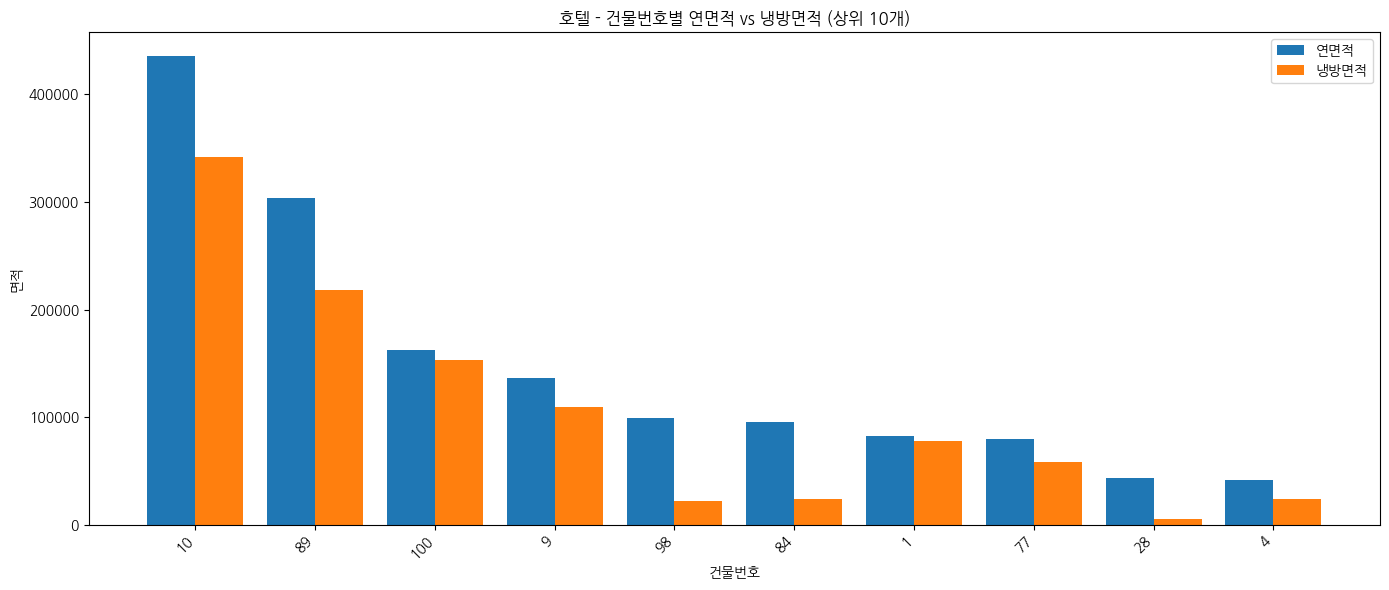

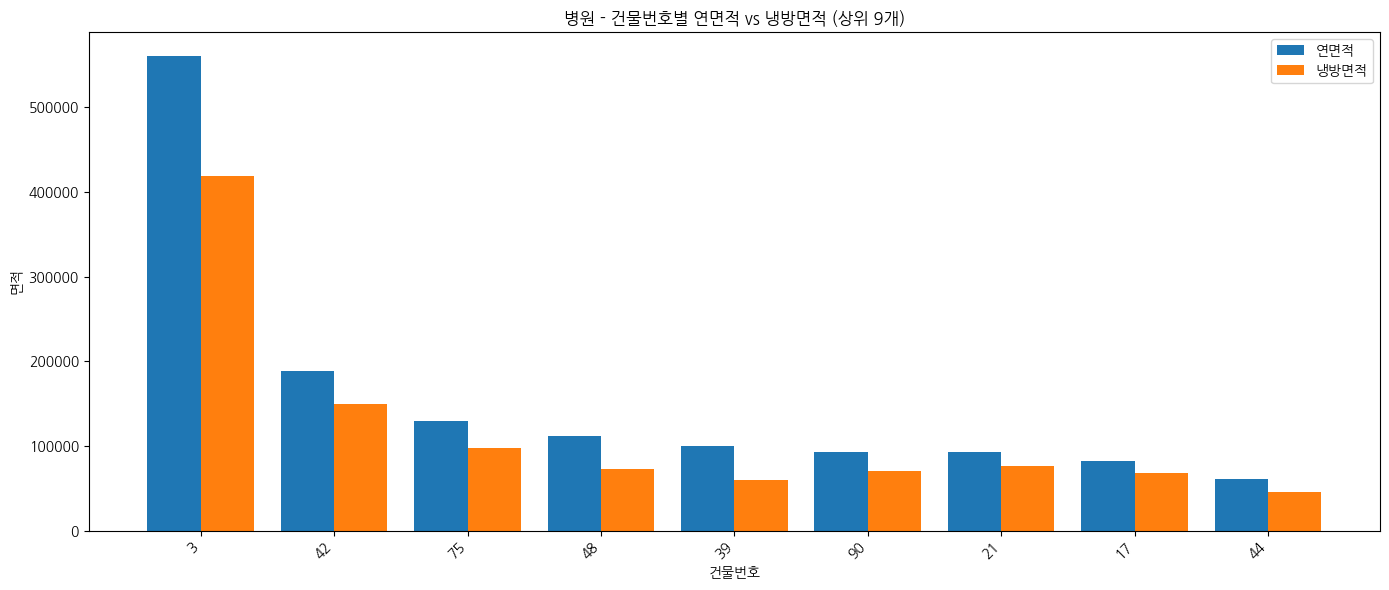

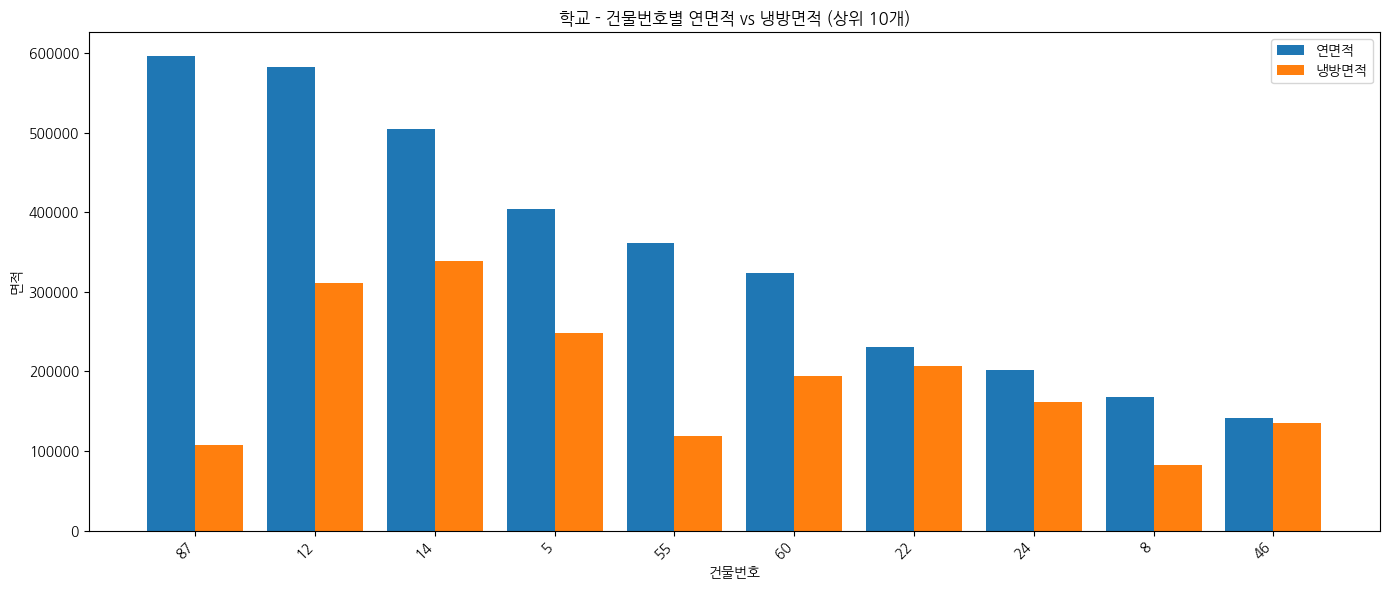

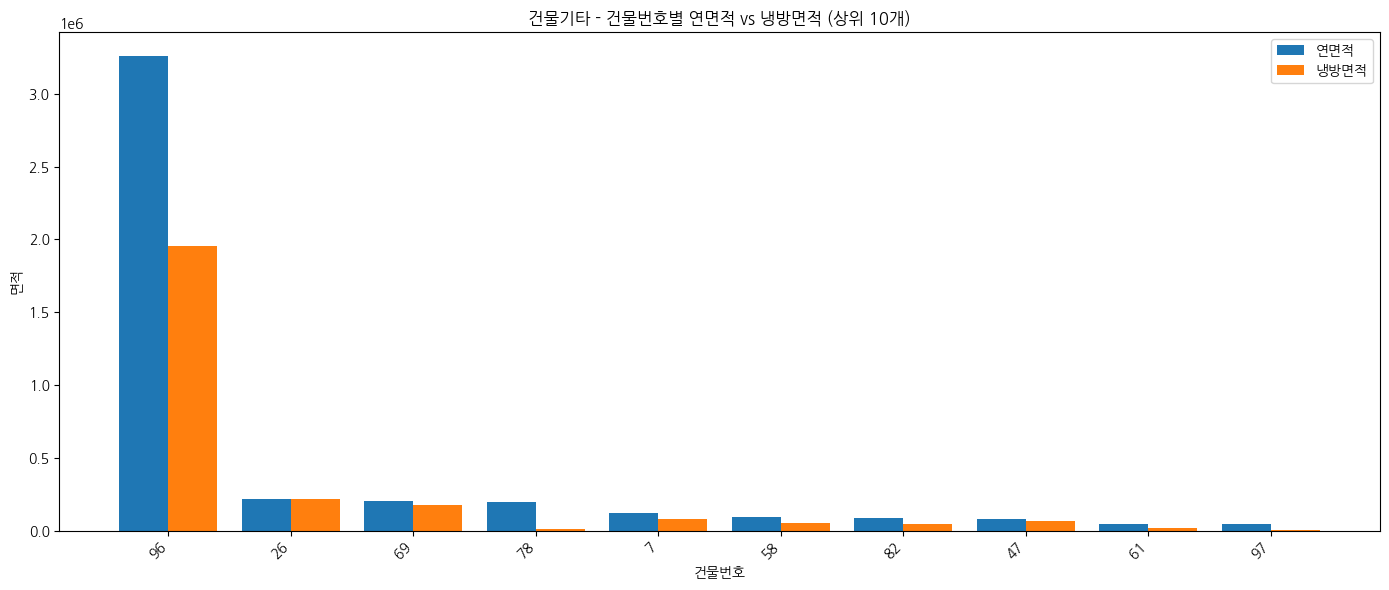

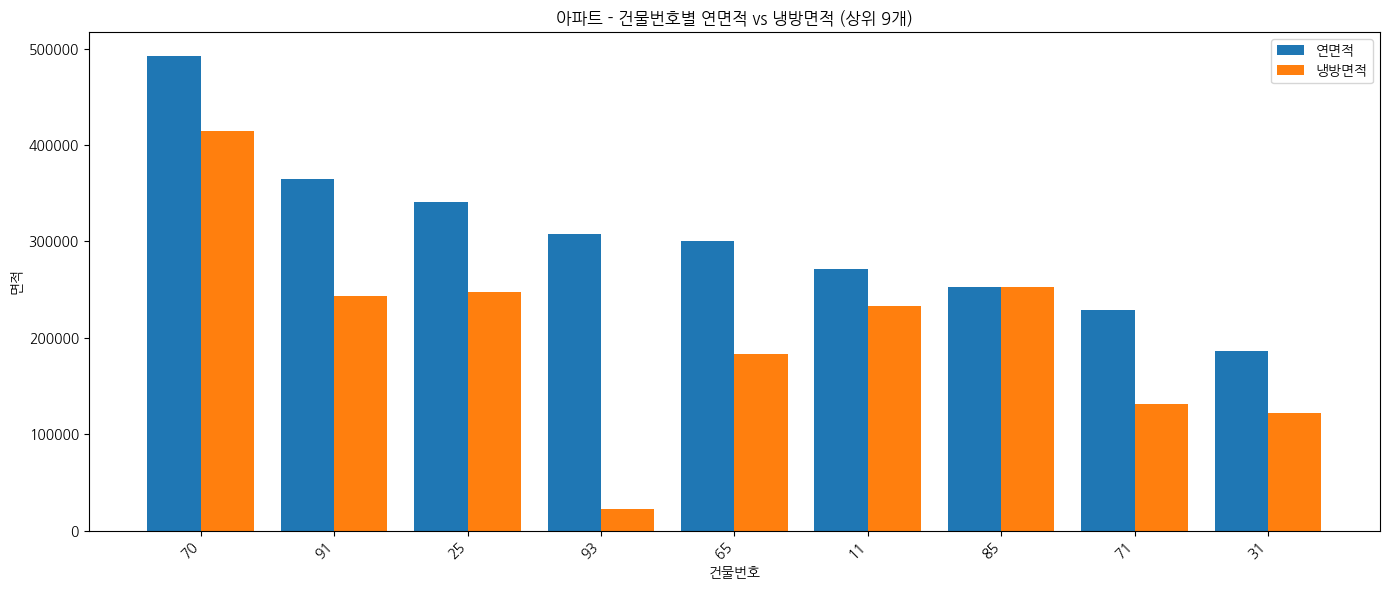

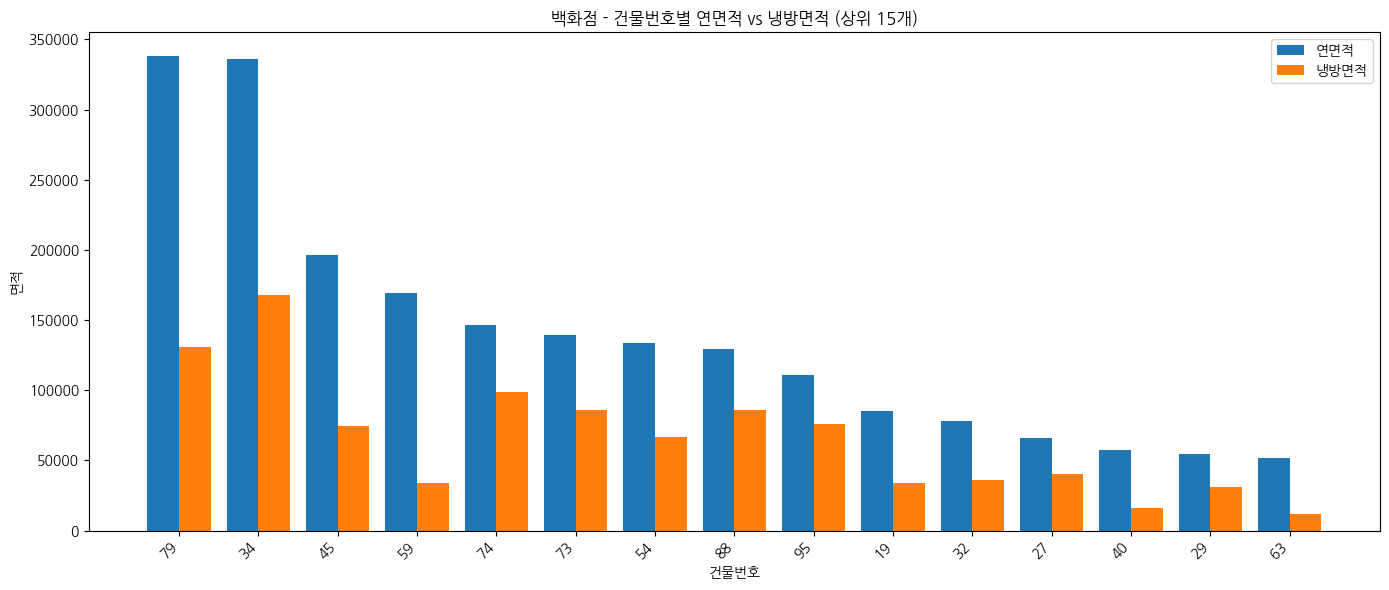

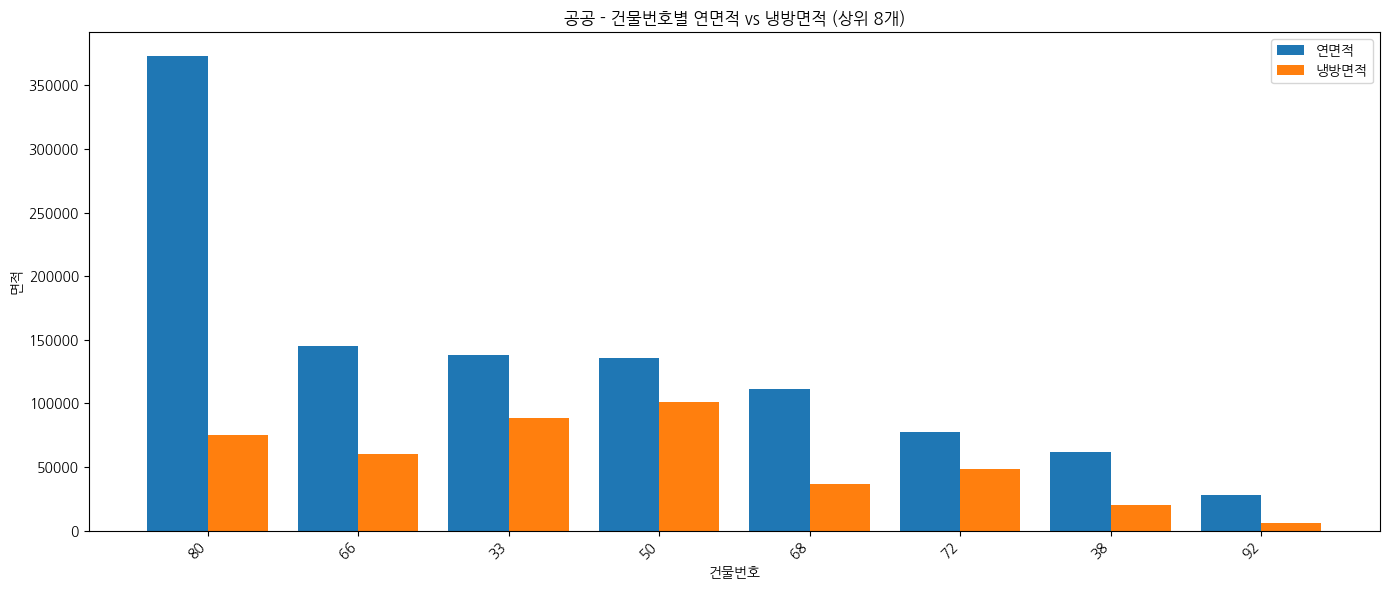

('/mnt/data/building_type_comparison_charts.zip',
 '/mnt/data/plots_by_type/per_type_top15_table.csv',
 '/mnt/data/plots_by_type')

In [ ]:
# -*- coding: utf-8 -*-
import os, re, io, zipfile
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# ---------- 0) Korean font (best-effort; no internet/apt here) ----------
installed = {f.name for f in fm.fontManager.ttflist}
for name in ["NanumGothic", "Malgun Gothic", "AppleGothic",
             "Noto Sans CJK KR", "Noto Sans CJK", "NotoSansKR-Regular"]:
    if name in installed:
        mpl.rcParams["font.family"] = name
        break
mpl.rcParams["axes.unicode_minus"] = False

# ---------- 1) Load building_info ----------
def read_csv_robust(path):
    for enc in ["utf-8", "cp949", "euc-kr"]:
        try:
            return pd.read_csv(path, encoding=enc)
        except Exception:
            pass
    return pd.read_csv(path)


bi   =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/building_info.csv', encoding='utf-8')

# ---------- 2) Column detection ----------
def find_col(cols, patterns):
    for pat in patterns:
        for c in cols:
            if re.search(pat, str(c), flags=re.IGNORECASE):
                return c
    return None

bnum_col  = find_col(bi.columns, [r"Í±¥Î¨ºÎ≤àÌò∏", r"building[_\s-]*id", r"Í±¥Î¨º\s*ID", r"bldg[_\s-]*id"])
btype_col = find_col(bi.columns, [r"Í±¥Î¨º\s*Ïú†Ìòï", r"Í±¥Î¨º\s*Ïö©ÎèÑ", r"Ïú†Ìòï", r"Ïö©ÎèÑ", r"type"])
gfa_col   = find_col(bi.columns, [r"Ïó∞\s*Î©¥\s*Ï†Å", r"Ï¥ù\s*Î©¥\s*Ï†Å", r"Ïó∞Î©¥Ï†Å", r"GFA", r"floor\s*area"])
cool_col  = find_col(bi.columns, [r"ÎÉâ\s*Î∞©\s*Î©¥\s*Ï†Å", r"ÎÉâÎ∞©Î©¥Ï†Å", r"cool.*area"])

missing = []
if bnum_col  is None: missing.append("Í±¥Î¨ºÎ≤àÌò∏/building_id")
if btype_col is None: missing.append("Í±¥Î¨ºÏú†Ìòï")
if gfa_col   is None: missing.append("Ïó∞Î©¥Ï†Å(GFA)")
if cool_col  is None: missing.append("ÎÉâÎ∞©Î©¥Ï†Å")
if missing:
    raise ValueError(f"Îã§Ïùå Ïª¨ÎüºÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§: {missing}\nÌòÑÏû¨ Ïª¨Îüº: {list(bi.columns)}")

# ---------- 3) Prepare data ----------
df = bi[[bnum_col, btype_col, gfa_col, cool_col]].copy()
for c in [gfa_col, cool_col]:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace(",", ""), errors="coerce")

# Drop rows with both NaN in metrics
df = df.dropna(subset=[gfa_col, cool_col], how="all")

# Ensure building number is string for labeling
df[bnum_col] = df[bnum_col].astype(str)

# ---------- 4) Per-type grouped bar charts (GFA vs Cooling) ----------
out_dir = "/mnt/data/plots_by_type"
os.makedirs(out_dir, exist_ok=True)

# Helper to slugify file names
def slug(s):
    s = str(s)
    s = re.sub(r"[^\w\-]+", "_", s, flags=re.UNICODE)
    return s[:60]

# Limit number of buildings per type to keep readability
TOP_N = 15

# Keep a manifest for CSV
manifest_rows = []

unique_types = df[btype_col].dropna().unique().tolist()

for t in unique_types:
    sub = df[df[btype_col] == t].copy()
    # Order by GFA (desc), use 0 for NaN
    sub["_sort_key"] = sub[gfa_col].fillna(0)
    sub = sub.sort_values("_sort_key", ascending=False).drop(columns=["_sort_key"])
    sub_top = sub.head(TOP_N)

    # Append to manifest
    for _, r in sub_top.iterrows():
        manifest_rows.append({
            "Í±¥Î¨ºÏú†Ìòï": t,
            "Í±¥Î¨ºÎ≤àÌò∏": r[bnum_col],
            "Ïó∞Î©¥Ï†Å": r[gfa_col],
            "ÎÉâÎ∞©Î©¥Ï†Å": r[cool_col]
        })

    # Build grouped bars
    x = np.arange(len(sub_top))
    w = 0.4

    plt.figure(figsize=(14, 6))
    plt.bar(x - w/2, sub_top[gfa_col].values, width=w, label="Ïó∞Î©¥Ï†Å")
    plt.bar(x + w/2, sub_top[cool_col].values, width=w, label="ÎÉâÎ∞©Î©¥Ï†Å")
    plt.title(f"{t} - Í±¥Î¨ºÎ≤àÌò∏Î≥Ñ Ïó∞Î©¥Ï†Å vs ÎÉâÎ∞©Î©¥Ï†Å (ÏÉÅÏúÑ {min(TOP_N, len(sub))}Í∞ú)")
    plt.xlabel("Í±¥Î¨ºÎ≤àÌò∏")
    plt.ylabel("Î©¥Ï†Å")
    plt.xticks(x, sub_top[bnum_col].astype(str).values, rotation=45, ha="right")
    plt.legend()
    plt.tight_layout()
    fname = f"{out_dir}/by_type_{slug(t)}.png"
    plt.savefig(fname, dpi=200)
    plt.show()

# ---------- 5) Save manifest CSV and ZIP all images ----------
manifest = pd.DataFrame(manifest_rows)
csv_path = f"{out_dir}/per_type_top{TOP_N}_table.csv"
manifest.to_csv(csv_path, index=False, encoding="utf-8-sig")

# Zip all PNGs + CSV
zip_path = "/mnt/data/building_type_comparison_charts.zip"
with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    for fn in os.listdir(out_dir):
        zf.write(os.path.join(out_dir, fn), arcname=f"plots_by_type/{fn}")

zip_path, csv_path, out_dir


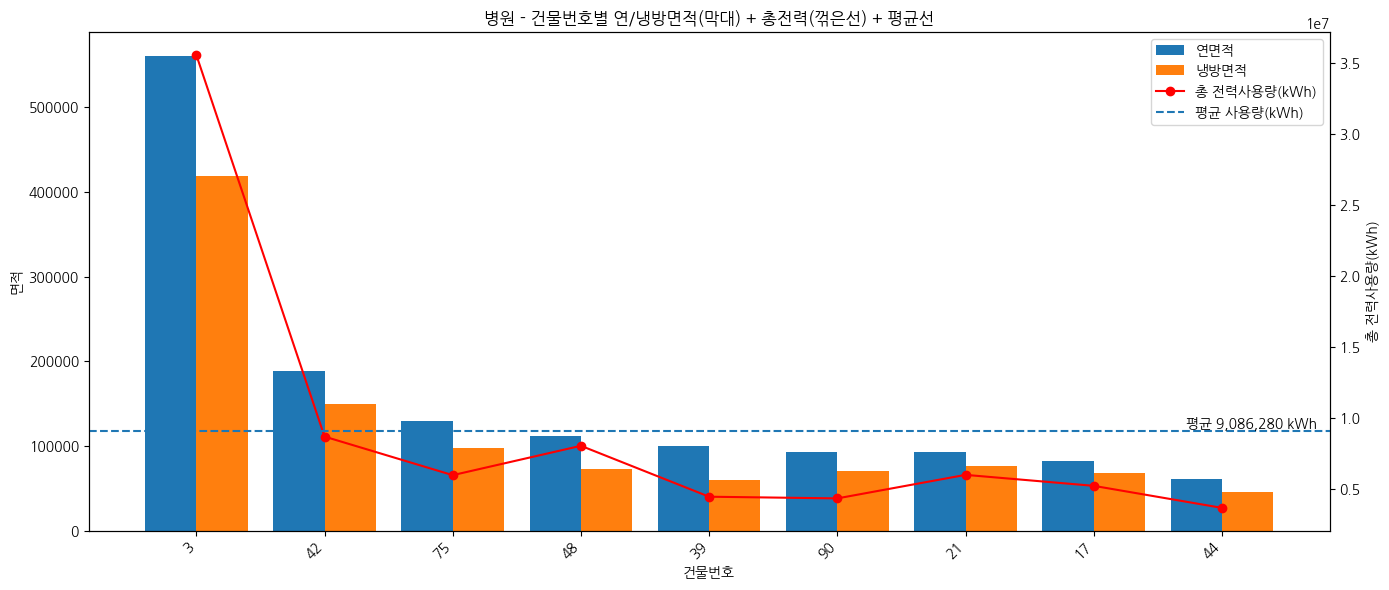

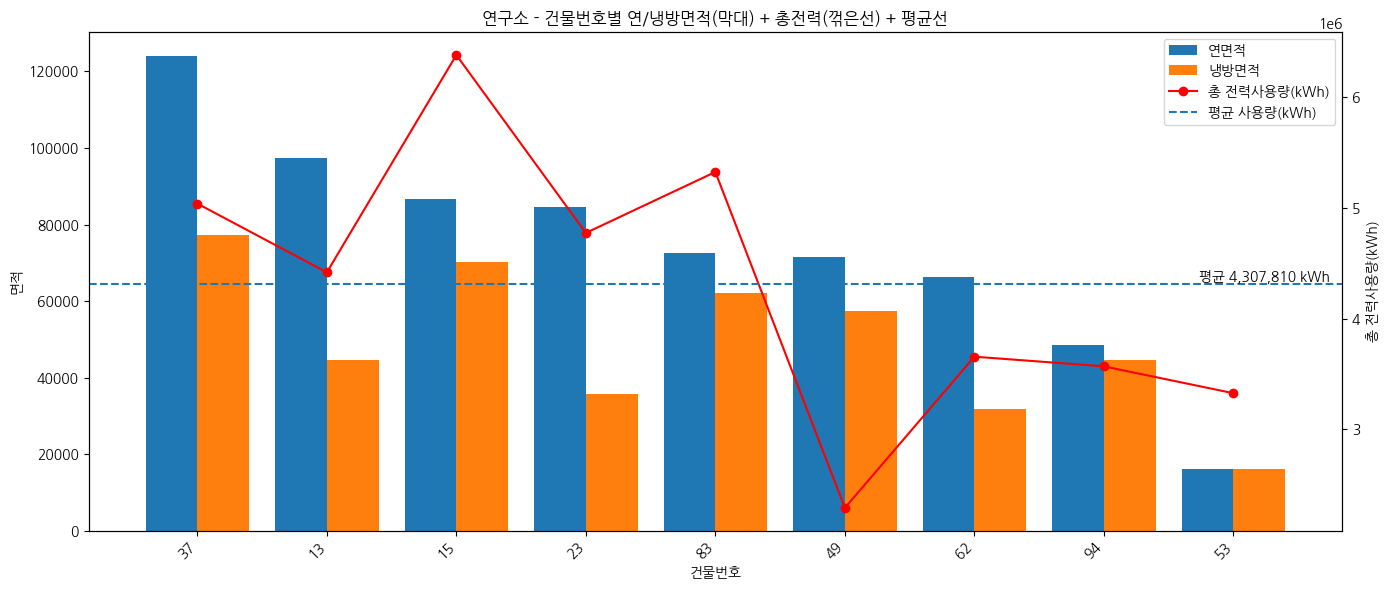

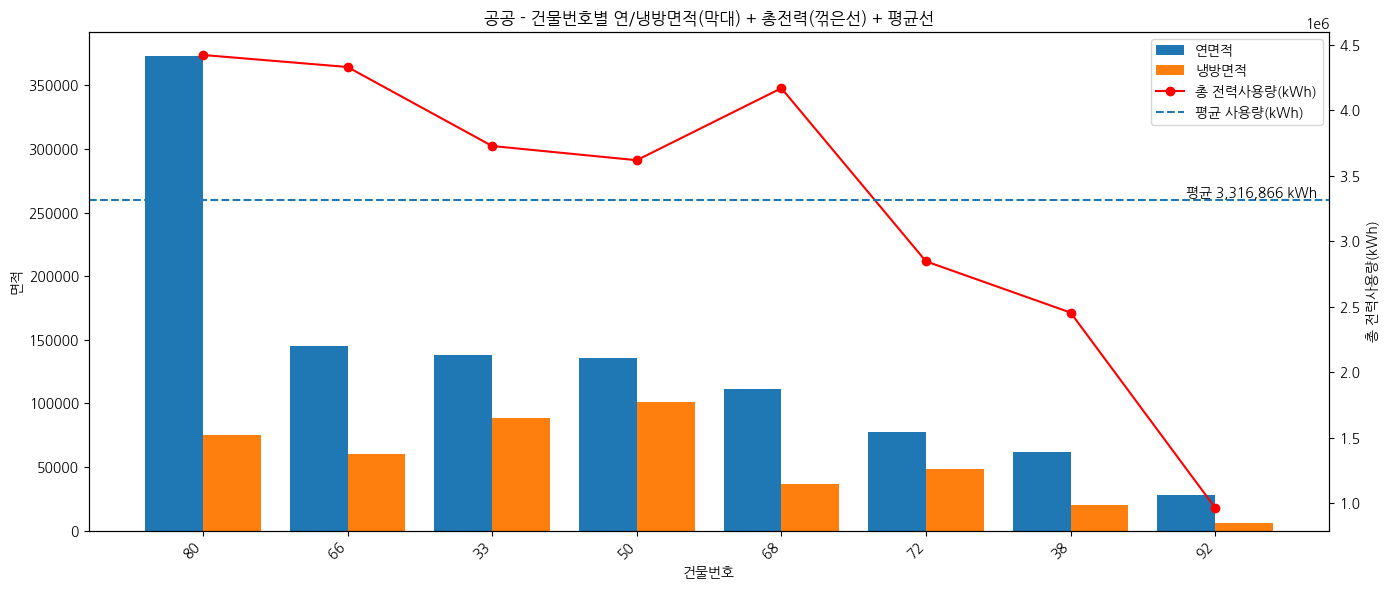

('/mnt/data/building_type_with_kwh_avg_charts.zip',
 '/mnt/data/plots_by_type_with_kwh_avg')

In [ ]:
# -*- coding: utf-8 -*-
import os, re, zipfile
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# ---------- 0) Korean font (best-effort) ----------
installed = {f.name for f in fm.fontManager.ttflist}
for name in ["NanumGothic", "Malgun Gothic", "AppleGothic",
             "Noto Sans CJK KR", "Noto Sans CJK", "NotoSansKR-Regular"]:
    if name in installed:
        mpl.rcParams["font.family"] = name
        break
mpl.rcParams["axes.unicode_minus"] = False

# ---------- 1) Load CSVs ----------
train =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/train.csv', encoding='utf-8')
bi   =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/building_info.csv', encoding='utf-8')

# ---------- 2) Column detection ----------
def find_col(cols, patterns):
    for pat in patterns:
        for c in cols:
            if re.search(pat, str(c), flags=re.IGNORECASE):
                return c
    return None

bnum_bi  = find_col(bi.columns,    [r"Í±¥Î¨ºÎ≤àÌò∏", r"building[_\s-]*id", r"Í±¥Î¨º\s*ID", r"bldg[_\s-]*id"])
bnum_tr  = find_col(train.columns, [r"Í±¥Î¨ºÎ≤àÌò∏", r"building[_\s-]*id", r"Í±¥Î¨º\s*ID", r"bldg[_\s-]*id"])
btype_col = find_col(bi.columns,   [r"Í±¥Î¨º\s*Ïú†Ìòï", r"Í±¥Î¨º\s*Ïö©ÎèÑ", r"Ïú†Ìòï", r"Ïö©ÎèÑ", r"type"])
gfa_col   = find_col(bi.columns,   [r"Ïó∞\s*Î©¥\s*Ï†Å", r"Ï¥ù\s*Î©¥\s*Ï†Å", r"Ïó∞Î©¥Ï†Å", r"GFA", r"floor\s*area"])
cool_col  = find_col(bi.columns,   [r"ÎÉâ\s*Î∞©\s*Î©¥\s*Ï†Å", r"ÎÉâÎ∞©Î©¥Ï†Å", r"cool.*area"])
kwh_col   = find_col(train.columns,[r"Ï†ÑÎ†•\s*ÏÜåÎπÑ\s*Îüâ.*kwh", r"Ï†ÑÎ†•\s*ÏÇ¨Ïö©\s*Îüâ.*kwh", r"\bkwh\b", r"electric.*(use|consum)", r"power.*(use|consum)"])

if any(c is None for c in [bnum_bi, bnum_tr, btype_col, gfa_col, cool_col, kwh_col]):
    raise ValueError(f"Ïª¨Îüº ÏûêÎèôÌÉêÏÉâ Ïã§Ìå®.\nbi cols: {list(bi.columns)}\ntrain cols: {list(train.columns)}")

# ---------- 3) Prepare merged ----------
for c in [gfa_col, cool_col]:
    bi[c] = pd.to_numeric(bi[c].astype(str).str.replace(",", ""), errors="coerce")
train[kwh_col] = pd.to_numeric(train[kwh_col], errors="coerce")

kwh_by_bld = (train.groupby(bnum_tr)[kwh_col]
                   .sum(min_count=1)
                   .rename("Ï¥ùÏ†ÑÎ†•ÏÇ¨Ïö©Îüâ_kWh")
                   .reset_index()
                   .rename(columns={bnum_tr: "Í±¥Î¨ºÎ≤àÌò∏_key"}))

bi_slim = bi[[bnum_bi, btype_col, gfa_col, cool_col]].copy()
bi_slim = bi_slim.rename(columns={bnum_bi: "Í±¥Î¨ºÎ≤àÌò∏_key"})

merged = pd.merge(bi_slim, kwh_by_bld, on="Í±¥Î¨ºÎ≤àÌò∏_key", how="left")
merged["Í±¥Î¨ºÎ≤àÌò∏_key"] = merged["Í±¥Î¨ºÎ≤àÌò∏_key"].astype(str)

# ---------- 4) Plot per type (bars + line + avg line) ----------
out_dir = "/mnt/data/plots_by_type_with_kwh_avg"
os.makedirs(out_dir, exist_ok=True)

def slug(s):
    s = str(s)
    s = re.sub(r"[^\w\-]+", "_", s, flags=re.UNICODE)
    return s[:60]

TOP_N = 15
types = merged[btype_col].dropna().unique().tolist()

for t in types:
    sub = merged[merged[btype_col] == t].copy()
    sub["_sort_key"] = pd.to_numeric(sub[gfa_col], errors="coerce").fillna(0)
    sub = sub.sort_values("_sort_key", ascending=False).drop(columns=["_sort_key"])
    sub_top = sub.head(TOP_N)

    x = np.arange(len(sub_top))
    w = 0.4

    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.bar(x - w/2, pd.to_numeric(sub_top[gfa_col], errors="coerce").values, width=w, label="Ïó∞Î©¥Ï†Å")
    ax1.bar(x + w/2, pd.to_numeric(sub_top[cool_col], errors="coerce").values, width=w, label="ÎÉâÎ∞©Î©¥Ï†Å")
    ax1.set_xlabel("Í±¥Î¨ºÎ≤àÌò∏")
    ax1.set_ylabel("Î©¥Ï†Å")
    ax1.set_xticks(x, sub_top["Í±¥Î¨ºÎ≤àÌò∏_key"].astype(str).values, rotation=45, ha="right")

    # ---- line: total kWh ----
    ax2 = ax1.twinx()
    y_kwh = pd.to_numeric(sub_top["Ï¥ùÏ†ÑÎ†•ÏÇ¨Ïö©Îüâ_kWh"], errors="coerce").fillna(0).values
    ax2.plot(x, y_kwh, marker="o", color="red", label="Ï¥ù Ï†ÑÎ†•ÏÇ¨Ïö©Îüâ(kWh)")
    ax2.set_ylabel("Ï¥ù Ï†ÑÎ†•ÏÇ¨Ïö©Îüâ(kWh)")

    # ---- avg line (mean usage) ----
    mean_kwh = pd.to_numeric(sub_top["Ï¥ùÏ†ÑÎ†•ÏÇ¨Ïö©Îüâ_kWh"], errors="coerce").mean()
    if pd.notna(mean_kwh):
        ax2.axhline(mean_kwh, linestyle="--", label="ÌèâÍ∑† ÏÇ¨Ïö©Îüâ(kWh)")
        # optional annotation
        ax2.text(0.99, mean_kwh, f"ÌèâÍ∑† {mean_kwh:,.0f} kWh",
                 va="bottom", ha="right", transform=ax2.get_yaxis_transform())

    # title & legend
    ax1.set_title(f"{t} - Í±¥Î¨ºÎ≤àÌò∏Î≥Ñ Ïó∞/ÎÉâÎ∞©Î©¥Ï†Å(ÎßâÎåÄ) + Ï¥ùÏ†ÑÎ†•(Í∫æÏùÄÏÑ†) + ÌèâÍ∑†ÏÑ†")
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="upper right")

    fig.tight_layout()
    fig.savefig(f"{out_dir}/by_type_with_kwh_avg_{slug(t)}.png", dpi=200)
    plt.show()

# ---------- 5) Zip ----------
zip_path = "/mnt/data/building_type_with_kwh_avg_charts.zip"
with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    for fn in os.listdir(out_dir):
        zf.write(os.path.join(out_dir, fn), arcname=f"plots_by_type_with_kwh_avg/{fn}")

zip_path, out_dir


In [ ]:
sns.pointplot(data=df, x='Í±¥Î¨ºÏú†Ìòï', y=target, errorbar='se')


<Axes: xlabel='Í±¥Î¨ºÏú†Ìòï', ylabel='Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)'>

In [ ]:
!pip install -q ipywidgets==8.1.2 plotly==5.*
from google.colab import output
output.enable_custom_widget_manager()  # üîë ÏúÑÏ†Ø ÌëúÏãú ÌôúÏÑ±Ìôî


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 139.4/139.4 kB 4.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.2/2.2 MB 14.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 13.1 MB/s eta 0:00:00


In [ ]:
import ipywidgets as w; w.IntSlider()

IntSlider(value=0)

In [ ]:
# =========================================
# Plotly + ipywidgets ÎåÄÏãúÎ≥¥Îìú (ÏàòÏ†ïÎ≥∏)
# - 1) Í±¥Î¨ºÏú†Ìòï ÏÑ†ÌÉù ‚Üí 2) Í±¥Î¨ºÎ≤àÌò∏ ÏÑ†ÌÉù ‚Üí 3) ÏãúÍ∞Ñ/Ïùº/Ï£º Îã®ÏúÑ ÏãúÍ≥ÑÏó¥
# - 'H' Í≤ΩÍ≥† Ìï¥Í≤∞: ÏÜåÎ¨∏Ïûê 'h' ÏÇ¨Ïö©
# - ÎßàÏßÄÎßâ Ï∂úÎ†•: display(ui)  ‚úÖ
# =========================================
import os, re
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import display
import ipywidgets as widgets

import plotly.io as pio
pio.renderers.default = "colab"

# (ColabÏùº Îïå ÏúÑÏ†Ø ÌëúÏãú ÌôúÏÑ±Ìôî)
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except Exception:
    pass

# ---------- 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú ----------
train =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/train.csv', encoding='utf-8')
bi   =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/building_info.csv', encoding='utf-8')

# ---------- 2) Ïª¨Îüº ÏûêÎèô ÌÉêÏÉâ ----------
def find_col(cols, patterns):
    for pat in patterns:
        for c in cols:
            if re.search(pat, str(c), flags=re.IGNORECASE):
                return c
    return None

bnum_tr  = find_col(train.columns, [r"Í±¥Î¨ºÎ≤àÌò∏", r"building[_\s-]*id", r"Í±¥Î¨º\s*ID", r"bldg[_\s-]*id"])
bnum_bi  = find_col(bi.columns,    [r"Í±¥Î¨ºÎ≤àÌò∏", r"building[_\s-]*id", r"Í±¥Î¨º\s*ID", r"bldg[_\s-]*id"])
btype_col= find_col(bi.columns,    [r"Í±¥Î¨º\s*Ïú†Ìòï", r"Í±¥Î¨º\s*Ïö©ÎèÑ", r"Ïú†Ìòï", r"Ïö©ÎèÑ", r"type"])
time_col = find_col(train.columns, [r"ÏùºÏãú", r"date[_\s-]*time", r"timestamp", r"datetime", r"date"])
kwh_col  = find_col(train.columns, [r"Ï†ÑÎ†•\s*ÏÜåÎπÑ\s*Îüâ.*kwh", r"Ï†ÑÎ†•\s*ÏÇ¨Ïö©\s*Îüâ.*kwh", r"\bkwh\b", r"electric.*(use|consum)", r"power.*(use|consum)"])

missing = [name for name, col in [
    ("Í±¥Î¨ºÎ≤àÌò∏(train)", bnum_tr), ("Í±¥Î¨ºÎ≤àÌò∏(bi)", bnum_bi), ("Í±¥Î¨ºÏú†Ìòï", btype_col),
    ("ÏùºÏãú", time_col), ("Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)", kwh_col)
] if col is None]
assert not missing, f"Îã§Ïùå Ïª¨ÎüºÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§: {missing}\ntrain cols={list(train.columns)}\nbi cols={list(bi.columns)}"

# ---------- 3) Î≥ëÌï© Î∞è Ï†ÑÏ≤òÎ¶¨ ----------
train[time_col] = pd.to_datetime(train[time_col], errors="coerce")
train[kwh_col]  = pd.to_numeric(train[kwh_col], errors="coerce")

bi_slim = bi[[bnum_bi, btype_col]].copy().rename(columns={bnum_bi: "Í±¥Î¨ºÎ≤àÌò∏_key"})
df = (train.rename(columns={bnum_tr: "Í±¥Î¨ºÎ≤àÌò∏_key"})
            .merge(bi_slim, on="Í±¥Î¨ºÎ≤àÌò∏_key", how="left"))

df_valid = df.dropna(subset=[time_col, kwh_col, "Í±¥Î¨ºÎ≤àÌò∏_key", btype_col]).copy()
df_valid["Í±¥Î¨ºÎ≤àÌò∏_key"] = df_valid["Í±¥Î¨ºÎ≤àÌò∏_key"].astype(str)
df_valid[btype_col]      = df_valid[btype_col].astype(str)

types = sorted(df_valid[btype_col].unique().tolist())

def bld_options_for(t):
    opts = sorted(df_valid.loc[df_valid[btype_col]==t, "Í±¥Î¨ºÎ≤àÌò∏_key"].unique().tolist())
    return opts if opts else ["(Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå)"]

# ---------- 4) ÏúÑÏ†Ø ----------
type_dd = widgets.Dropdown(options=types, description="Í±¥Î¨ºÏú†Ìòï:", layout=widgets.Layout(width="35%"))
bld_dd  = widgets.Dropdown(options=bld_options_for(types[0] if types else None),
                           description="Í±¥Î¨ºÎ≤àÌò∏:", layout=widgets.Layout(width="35%"))

# ‚ö†Ô∏è 'H' ÎåÄÏã† ÏÜåÎ¨∏Ïûê 'h' ÏÇ¨Ïö©
freq_tb = widgets.ToggleButtons(options=[("ÏãúÍ∞ÑÎ≥Ñ","h"), ("ÏùºÎ≥Ñ","D"), ("Ï£ºÎ≥Ñ","W")],
                                value="h", description="ÏßëÍ≥Ñ:")

# ---------- 5) Plotly FigureWidget ----------
fig = go.FigureWidget(layout=dict(
    height=520, margin=dict(l=50, r=30, t=50, b=40),
    xaxis_title="ÏùºÏãú", yaxis_title="Ï†ÑÎ†•ÏÇ¨Ïö©Îüâ (kWh)",
    title="Í±¥Î¨ºÎ≥Ñ Ï†ÑÎ†•ÏÇ¨Ïö©Îüâ ÏãúÍ≥ÑÏó¥"
))

# ---------- 6) ÏΩúÎ∞± ----------
def update_building_options(change=None):
    new_opts = bld_options_for(type_dd.value)
    bld_dd.options = new_opts
    if bld_dd.value not in new_opts:
        bld_dd.value = new_opts[0] if new_opts else None

def update_figure(change=None):
    t  = type_dd.value
    b  = bld_dd.value
    fq = freq_tb.value               # 'h' / 'D' / 'W'
    label_map = {'h':'ÏãúÍ∞Ñ', 'D':'Ïùº', 'W':'Ï£º'}

    with fig.batch_update():
        fig.data = []
        if (not t) or (not b) or b == "(Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå)":
            fig.update_layout(title=f"{t} - Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå")
            return

        sub = df_valid[(df_valid[btype_col]==t) & (df_valid["Í±¥Î¨ºÎ≤àÌò∏_key"]==str(b))]
        if sub.empty:
            fig.update_layout(title=f"{t} / {b} - Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå")
            return

        ts = (sub.set_index(time_col)[kwh_col]
                .resample(fq)        # ‚úÖ 'h' ÏÇ¨Ïö©
                .sum(min_count=1)
                .dropna())
        if ts.empty:
            fig.update_layout(title=f"{t} / {b} - ÏßëÍ≥Ñ Í≤∞Í≥º ÏóÜÏùå")
            return

        fig.add_scatter(x=ts.index, y=ts.values, mode="lines+markers",
                        name=f"{b} ({label_map[fq]})")
        fig.update_layout(title=f"{t} / Í±¥Î¨ºÎ≤àÌò∏ {b} - Ï†ÑÎ†•ÏÇ¨Ïö©Îüâ ({label_map[fq]} Îã®ÏúÑ)")

# Ï¥àÍ∏∞Ìôî & Ïù¥Î≤§Ìä∏ Ïó∞Í≤∞
update_building_options()
update_figure()
type_dd.observe(update_building_options, names="value")
type_dd.observe(update_figure,          names="value")
bld_dd.observe(update_figure,           names="value")
freq_tb.observe(update_figure,          names="value")

# ---------- 7) UI ÌëúÏãú (‚úÖ Ïó¨Í∏∞Í∞Ä ÌïµÏã¨) ----------
ui = widgets.VBox([widgets.HBox([type_dd, bld_dd, freq_tb]), fig])
display(ui)

In [ ]:
print("Ïú†Ìòï Í∞úÏàò:", len(types))
print("ÏÑ†ÌÉù Ïú†ÌòïÏùò Í±¥Î¨º Ïàò:", len(df_valid[df_valid[btype_col]==types[0]]["Í±¥Î¨ºÎ≤àÌò∏_key"].unique()) if types else 0)


Ïú†Ìòï Í∞úÏàò: 10
ÏÑ†ÌÉù Ïú†ÌòïÏùò Í±¥Î¨º Ïàò: 9
